### 5. Hledání kořenů rovnice

#### Zadání:
Vyhledávání hodnot, při kterých dosáhne zkoumaný signál vybrané hodnoty je důležitou součástí analýzy časových řad. Pro tento účel existuje spousta zajímavých metod. Jeden typ metod se nazývá ohraničené (například metoda půlení intervalu), při kterých je zaručeno nalezení kořenu, avšak metody typicky konvergují pomalu. Druhý typ metod se nazývá neohraničené, které konvergují rychle, avšak svojí povahou nemusí nalézt řešení (metody využívající derivace). Vaším úkolem je vybrat tři různorodé funkce (například polynomiální, exponenciální/logaritmickou, harmonickou se směrnicí, aj.), které mají alespoň jeden kořen a nalézt ho jednou uzavřenou a jednou otevřenou metodou. Porovnejte časovou náročnost nalezení kořene a přesnost nalezení.

#### Vypracované řešení
1. Vybrání konkrétních funkcí a definování jejich derivace
2. Vizualizace funkcí v grafu
3. Implementace metody půlení intervalů
4. Implementace Newtonovy metody
5. Porovnání metod

In [143]:
import numpy as np
from time import time
from matplotlib import pyplot as plt

In [144]:
def function_polynomial(x):
    return x**3 - 2 * x**2 - 5 * x + 6


def function_exponential(x):
    return np.exp(x) - 4


def function_harmonic(x):
    return np.sin(x)


def function_polynomial_derivation(x):
    return 3 * x**2 - 4 * x - 5


def function_exponential_derivation(x):
    return np.exp(x)


def function_harmonic_derivation(x):
    return np.cos(x)

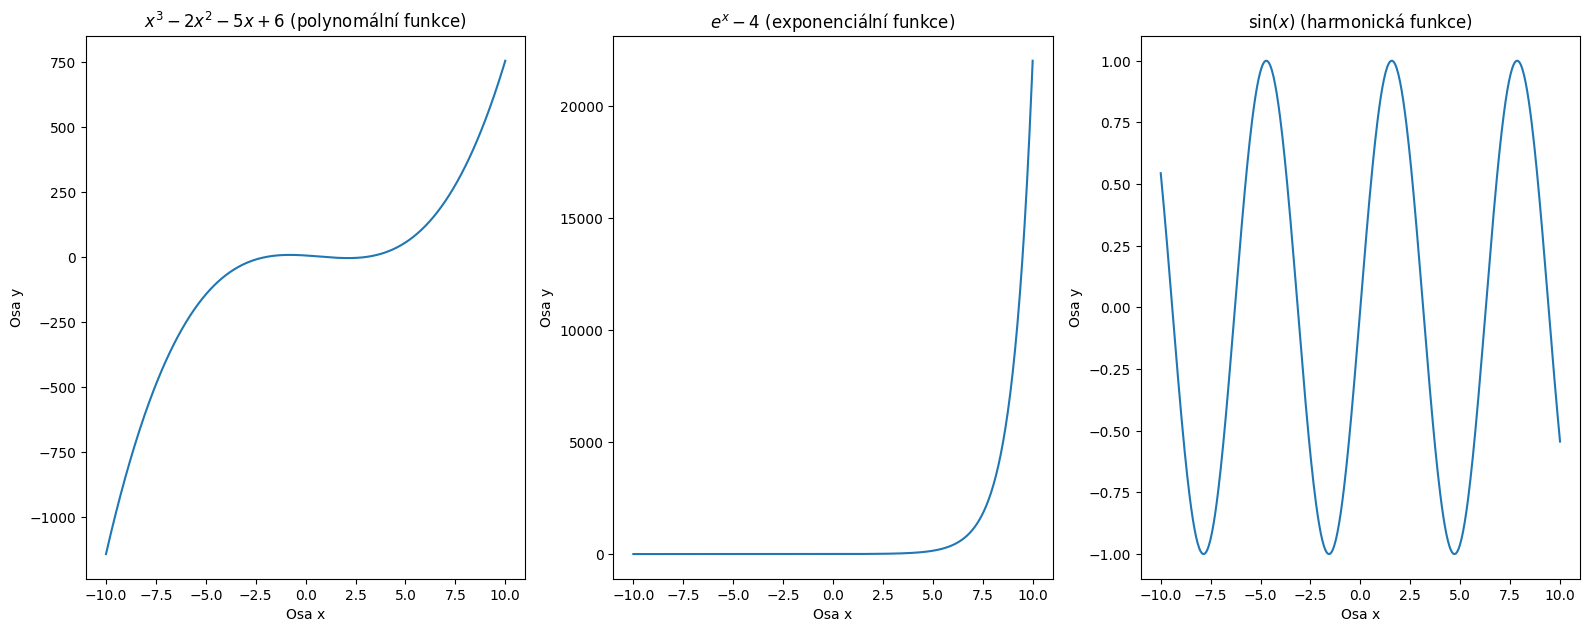

In [145]:
x_values = np.linspace(-10, 10, 500)
y_polynomial = function_polynomial(x_values)
y_exponential = function_exponential(x_values)
y_harmonic = function_harmonic(x_values)

plt.figure(figsize=(16, 12))

text_x = "Osa x"
text_y = "Osa y"

text = r"$x^3 - 2x^2 - 5x + 6$" + " (polynomální funkce)"
plt.subplot(2, 3, 1)
plt.plot(x_values, y_polynomial, label=text)
plt.xlabel(text_x)
plt.ylabel(text_y)
plt.title(text)

text = r"$e^x - 4$" + " (exponenciální funkce)"
plt.subplot(2, 3, 2)
plt.plot(x_values, y_exponential, label=text)
plt.xlabel(text_x)
plt.ylabel(text_y)
plt.title(text)

text = r"$\sin(x)$" + " (harmonická funkce)"
plt.subplot(2, 3, 3)
plt.plot(x_values, y_harmonic, label=text)
plt.xlabel(text_x)
plt.ylabel(text_y)
plt.title(text)

plt.tight_layout()
plt.show()

In [146]:
# Metoda půlení intervalů (bisekce) - ohraničená metoda
# https://x-engineer.org/bisection-method/
def bisection(function, interval_start=-100, interval_end=100, epsilon=0.000001):
    start = time()
    while abs(interval_end - interval_start) > epsilon:
        interval_middle = (interval_start + interval_end) / 2
        found_root = function(interval_middle) == 0
        if found_root:
            break
        is_root_between_start_and_end = (
            function(interval_start) * function(interval_middle) < 0
        )
        if is_root_between_start_and_end:
            interval_end = interval_middle
        else:
            interval_start = interval_middle
    end = time()
    total_time = end - start
    return (interval_middle, total_time)


# Newton-Raphsonova metoda - neohraničená metoda
# https://brilliant.org/wiki/newton-raphson-method/
def newton_raphson(function, x0, derivation_function, epsilon=0.000001):
    start = time()
    while abs(function(x0)) > epsilon:
        x0 = x0 - function(x0) / derivation_function(x0)
    end = time()
    total_time = end - start
    return (x0, total_time)

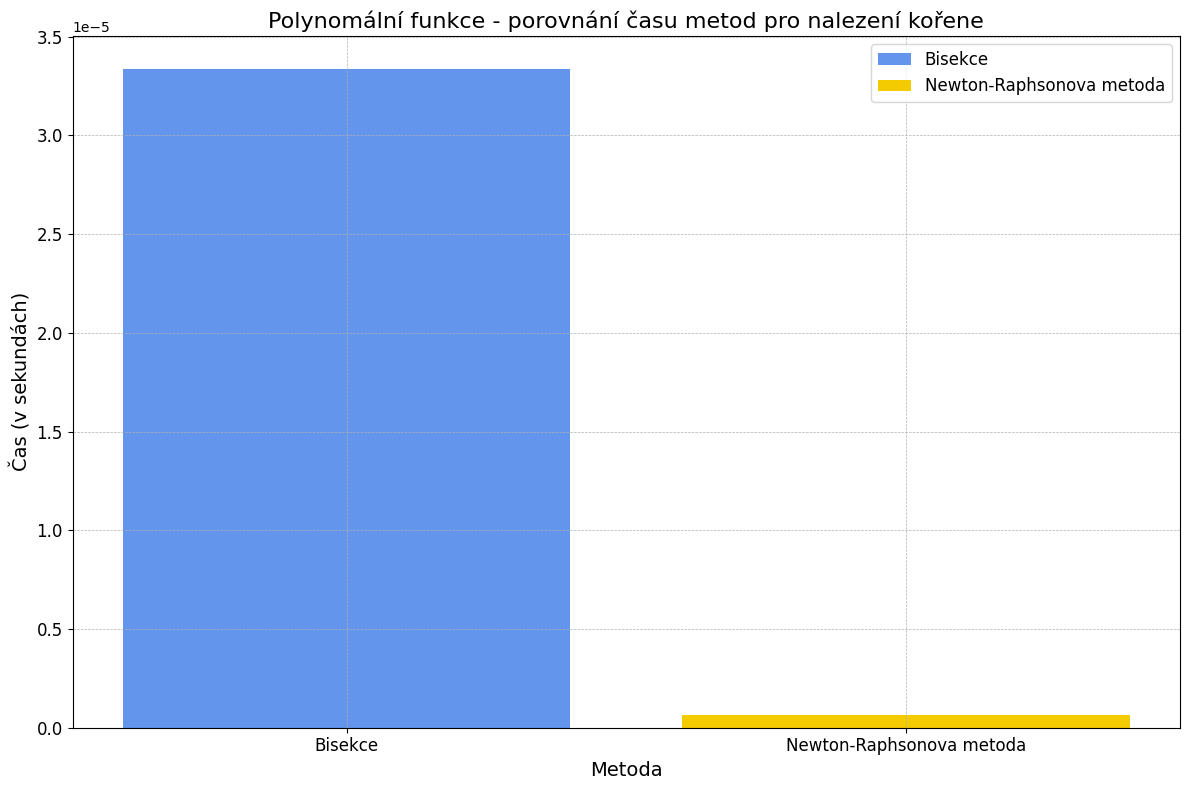

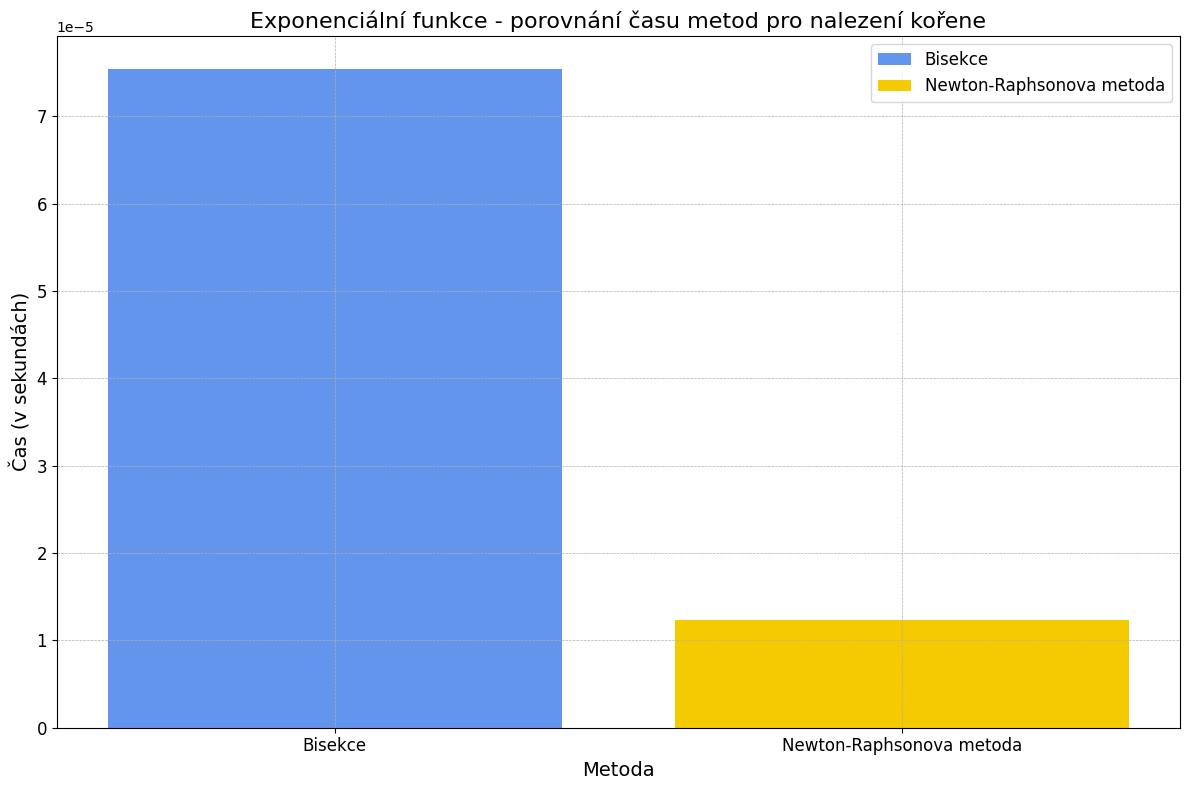

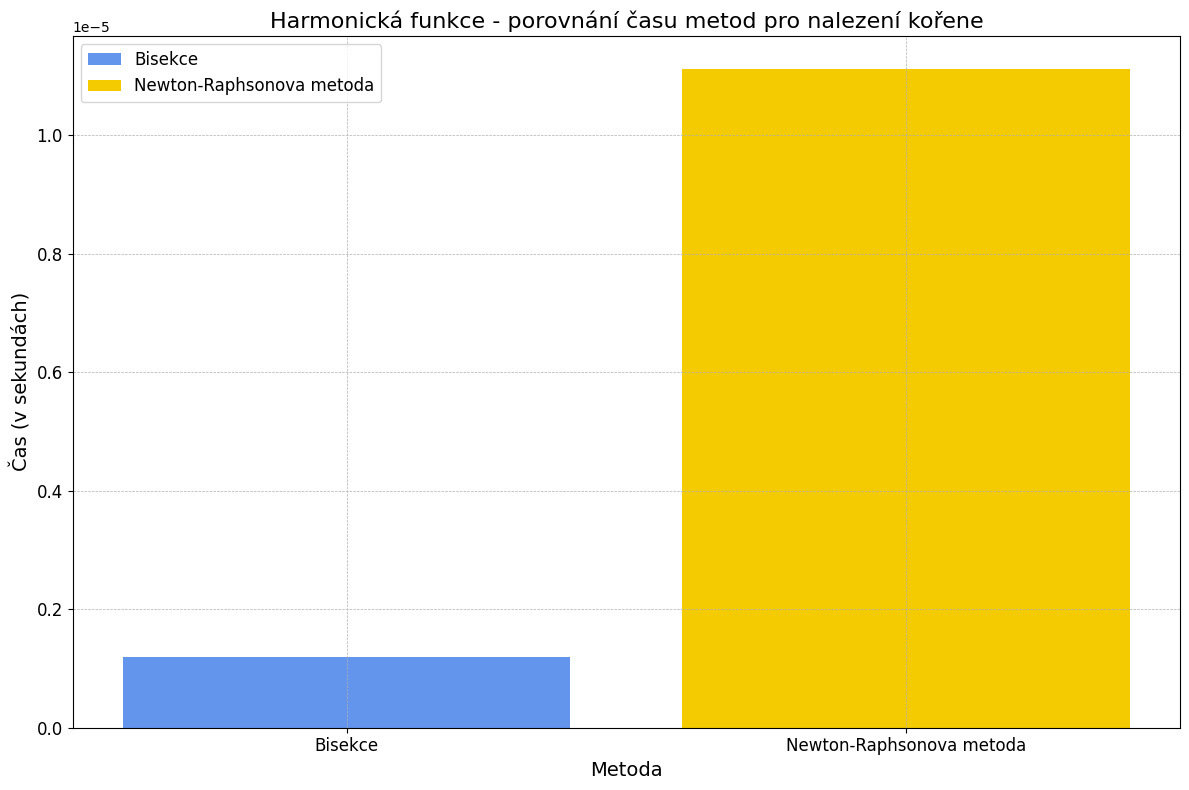

In [147]:
def compare_methods(function, derivation_function, initial_guess=1, repeat=100_000):
    times_bisection = []
    times_newton = []

    for _ in range(repeat):
        _, time_bisection = bisection(function)
        times_bisection.append(time_bisection)

        _, time_newton = newton_raphson(function, initial_guess, derivation_function)
        times_newton.append(time_newton)

    avg_time_bisection = sum(times_bisection) / len(times_bisection)
    avg_time_newton = sum(times_newton) / len(times_newton)
    return avg_time_bisection, avg_time_newton


time_polynomial_bisection, time_polynomial_newton = compare_methods(
    function_polynomial, function_polynomial_derivation
)

time_exponential_bisection, time_exponential_newton = compare_methods(
    function_exponential, function_exponential_derivation
)

time_harmonic_bisection, time_harmonic_newton = compare_methods(
    function_harmonic, function_harmonic_derivation
)

plt.figure(figsize=(12, 8))
plt.bar(0, time_polynomial_bisection, label="Bisekce", color="#6495ED")
plt.bar(1, time_polynomial_newton, label="Newton-Raphsonova metoda", color="#F3CB00")
plt.title("Polynomální funkce - porovnání času metod pro nalezení kořene", fontsize=16)
plt.xlabel("Metoda", fontsize=14)
plt.ylabel("Čas (v sekundách)", fontsize=14)
plt.xticks([0, 1], ["Bisekce", "Newton-Raphsonova metoda"], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(0, time_exponential_bisection, label="Bisekce", color="#6495ED")
plt.bar(1, time_exponential_newton, label="Newton-Raphsonova metoda", color="#F3CB00")
plt.title(
    "Exponenciální funkce - porovnání času metod pro nalezení kořene", fontsize=16
)
plt.xlabel("Metoda", fontsize=14)
plt.ylabel("Čas (v sekundách)", fontsize=14)
plt.xticks([0, 1], ["Bisekce", "Newton-Raphsonova metoda"], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.bar(0, time_harmonic_bisection, label="Bisekce", color="#6495ED")
plt.bar(1, time_harmonic_newton, label="Newton-Raphsonova metoda", color="#F3CB00")
plt.title("Harmonická funkce - porovnání času metod pro nalezení kořene", fontsize=16)
plt.xlabel("Metoda", fontsize=14)
plt.ylabel("Čas (v sekundách)", fontsize=14)
plt.xticks([0, 1], ["Bisekce", "Newton-Raphsonova metoda"], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()